In [1]:
pip install yfinance matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-macosx_11_0_arm64.whl size=264338 sha256=855e90146bbeb7e33e99d1929a227f3324eabba60c8e258809201d3997bab7d2
  Stored in directory: /Users/richardgomes/Library/Caches/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


# Coleta de Dados do Bitcoin
Este notebook baixa preços diários do Bitcoin (2017-2025) via Yahoo Finance e gera um gráfico inicial para análise de volatilidade.

## Passo 1: Baixar Dados
Usamos a biblioteca `yfinance` para coletar preços diários do Bitcoin (BTC-USD).

## Passo 2: Visualização
O gráfico mostra a evolução do preço do Bitcoin de 2017 a 2025, com picos em 2021 e quedas em 2022 (ex.: colapso da FTX).

[*********************100%***********************]  1 of 1 completed


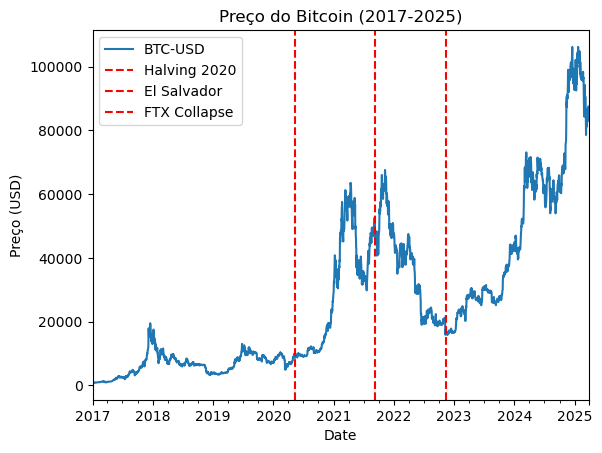

<Figure size 640x480 with 0 Axes>

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Baixar dados
btc = yf.download('BTC-USD', start='2017-01-01', end='2025-03-26', interval='1d')
btc.to_csv('../data/btc_prices.csv')

# Plotar preço com eventos
btc['Close'].plot(title='Preço do Bitcoin (2017-2025)')
events = {
    'Halving 2020': '2020-05-11',
    'El Salvador': '2021-09-07',
    'FTX Collapse': '2022-11-11'
}
for event_name, event_date in events.items():
    plt.axvline(pd.to_datetime(event_date), color='red', linestyle='--', label=event_name)
plt.legend()
plt.ylabel('Preço (USD)')
plt.show()
plt.savefig('../figures/btc_price_with_events.png')